## **PDAN8412 POE Part 3**
### Shivam Mayur Pillay
### ST10134058

# Data Set
The data set is from Orsolini (2018) the link to download this data set is seen below: 
#### https://www.kaggle.com/datasets/alxmamaev/flowers-recognition/download?datasetVersionNumber=2

*****

# __What and how image classification works.__

<p>According to Bandyopadhyay (2022) image classification is a machine learning task which is able to identify and label what an image depicts. For example, one could train a machine learning model to be able to identify a species of animal in a picture or provide a diagnosis off a medical scan to determine whether or not a person is sick. Bandyopadhyay (2022) states that image classification has advance efficiency in many field such as healthcare, automobile and even the manufacturing sector. </p>

<p>The Towards AI Team (2020) explains how a Convolutional Neural Network (CNN) is able to break down an image into a number of different features to detect features such as curves, textures and colours. The main difference between a CNN and any other neural network are the initial hidden layers, convolutional layers (deeplizard, 2017). These convolutional layers are specifically designed to convert and recognize these features into a reduced format which a computer can read without losing a significant amount of information (deeplizard, 2017). The model does this by identifiying the amount RGB (Red Green and Blue) in each area of the exmained image. </p>

<p>One of the main layers used described by the Towards AI Team (2020) is the Conv2D layer. This layer creates a grid called the filter with numbers in it which are called weights or parameters (Towards AI Team, 2020). The image also has grid placed over it with numerical values which represent RGB values in that space (Towards AI Team, 2020). The filter is then placed over the image grid, moving or ‘sliding’ across the whole image (Towards AI Team, 2020). The filter then takes the sum product of the weights and the observations to create a feature map (or activation function). </p> 

<p>Amidi and Amidi (2019) describes elements in the convolving step described by the Towards AI Team (2020). One of the elements or hyperparameters is the stride, this determines the number of blocks the filter moves over the image while creating the feature map. Another element is zero padding, this feature creates an extended grid around the image grid so that more parts of the filter can cover more combinations of blocks on the image (Amidi & Amidi, 2019). </p>

<p>A layer which is typically applied after the convolving step is the pooling step where the feature map is reduced in size to while keeping the important information needed to identify that specific feature (Towards AI Team, 2020). Average pooling is were a porting of the feature map is reduced to the average value in that area and another method is call max pooling where the largest number in that area and the others are discarded to create a new grid (Amidi & Amidi, 2019). This steps helps reduce overfitting in the CNN model (Towards AI Team, 2020). </p> 

<p>The final layer normally used in the convolutional portion of hidden layers is the flattening layer (Amidi & Amidi, 2019). This layers function it to take a grid of values (usually from the pooling layer) and convert it into a vector array which can be fed into successive layers seen in other neural networks which then eventually lead to a classification being made (Towards AI Team, 2020). </p>


*****

# __Why the chosen data set is appropriate for image classification.__

The data set selected is appropriate for image classification because there are five different/specified classes organized by folders which represent the respective classes (dasiy, dandelion, rose, sunflower and tulip). The images seen in the data set all have a single type of flower in them which makes it easier to train. The images are however in different sizes. To accomodate for this they will need to be resized to all be of equal value. 

*****

## __An explanation is included of what the analysis is that will be conducted on the data set.__

The data set will be loaded into the notebook by identifying the relevant file extentions. An image from each class will be loaded to ensure they were loaded correctly. At this point the data set will be split between training, validation and test set for the training phase. The images will then all be resized and converted in to arrays which the CNN can read in the Conv2D layer refered to above. The CNN process will then be conducted as per the explination above. Finally the performance of the model will be evaluated.

*****

<p>Once the data set has been downloaded from the link above the file is unzipped and the file labled "data" is cut and paste in a folder where the jupyter notebook is saved.</p>

<p>The data folder path is then defined as a variable (as seen below), the sub folders path's are counted per flower type and created as a list</p>

In [1]:
# This is to supress some of the warnings that may appear in the outputs of cells

import warnings
warnings.filterwarnings("ignore")

# (Python Software Foundation, 2009)

Load the data set, we can see there are 5 different categories of flowers in this data set

In [1]:
import os
dataset = ('flowers')

f_types = sorted(os.listdir(dataset))
n_f_types = len(f_types)

print(f"Total No. of Categories : {n_f_types}")

# (Orsolini, 2018)

Total No. of Categories : 5


The number of flower types in each category is plotted on a bar graph with the number of images on top of each bar. The number of flowers in each category are different but it is close enough, stratification should be considered when splitting the images between training, validation and test.

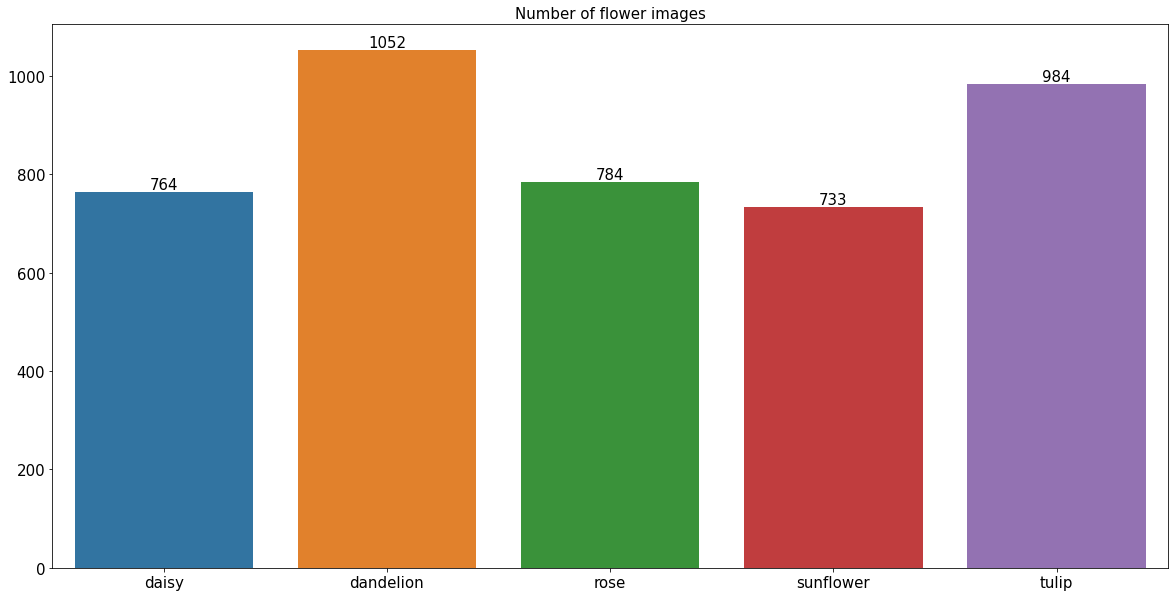

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

cat_count = [len(os.listdir(dataset + "/" + name)) for name in f_types]

plt.figure(figsize=(20,10))
ax=sns.barplot(x=f_types,y=cat_count)
for container in ax.containers:
    ax.bar_label(container,fontsize=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Number of flower images", fontsize=15)
plt.show()

# (The Matplotlib development team, 2022)
# (Seaborn, 2012)

One image from each category is then loaded below

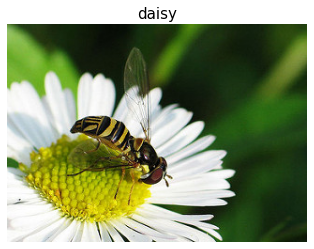

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

img = load_img(dataset+r"\daisy\5547758_eea9edfd54_n.jpg")
plt.axis("off")
plt.title('daisy', fontsize=15)
plt.imshow(img)

# (The Matplotlib development team, 2022)
# (TensorFlow Development Team, 2022)

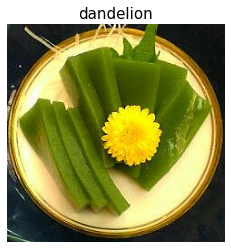

In [5]:
img = load_img(dataset+r"\dandelion\7355522_b66e5d3078_m.jpg")
plt.axis("off")
plt.title('dandelion', fontsize=15)
plt.imshow(img)

# (The Matplotlib development team, 2022)
# (TensorFlow Development Team, 2022)

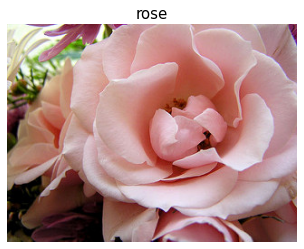

In [6]:
img = load_img(dataset+r"\rose\12240303_80d87f77a3_n.jpg")
plt.axis("off")
plt.title('rose', fontsize=15)
plt.imshow(img)

# (The Matplotlib development team, 2022)
# (TensorFlow Development Team, 2022)

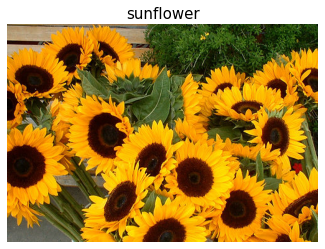

In [7]:
img = load_img(dataset+r"\sunflower\6953297_8576bf4ea3.jpg")
plt.axis("off")
plt.title('sunflower', fontsize=15)
plt.imshow(img)

# (The Matplotlib development team, 2022)
# (TensorFlow Development Team, 2022)

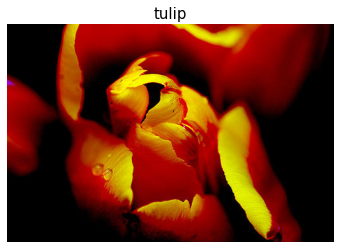

In [8]:
img = load_img(dataset+r"\tulip\10791227_7168491604.jpg")
plt.axis("off")
plt.title('tulip', fontsize=15)
plt.imshow(img)

# (The Matplotlib development team, 2022)
# (TensorFlow Development Team, 2022)

The folders are split between training, validation and test sets below

In [9]:
import splitfolders

splitfolders.ratio(input=dataset,output='output',seed=182,ratio=(.85,.1,0.05))

# (Filter, 2022)

Copying files: 4317 files [00:11, 364.81 files/s]


The data sets and their subfiles are defined as variables and a count per catergory is conducted for each set below. From this we can see that the flowers are distributed in a relative perportion to one another.

In [10]:
output='output'
train=(output+'/train')
val=(output+'/val')
test=(output+'/test')

train1=(train+'/daisy')
train2=(train+'/dandelion')
train3=(train+'/rose')
train4=(train+'/sunflower')
train5=(train+'/tulip')


val1=(val+'/daisy')
val2=(val+'/dandelion')
val3=(val+'/rose')
val4=(val+'/sunflower')
val5=(val+'/tulip')


test1=(test+'/daisy')
test2=(test+'/dandelion')
test3=(test+'/rose')
test4=(test+'/sunflower')
test5=(test+'/tulip')


print('Training Count')
print('Total number of Training images of daisy - ',len(os.listdir(train1)))
print('Total number of Training images of dandelion - ',len(os.listdir(train2)))
print('Total number of Training images of rose - ',len(os.listdir(train3)))
print('Total number of Training images of sunflower - ',len(os.listdir(train4)))
print('Total number of Training images of tulip - ',len(os.listdir(train5)))

print()
print('Validation Count')
print('Total number of Validation images of daisy - ',len(os.listdir(val1)))
print('Total number of Validation images of dandelion - ',len(os.listdir(val2)))
print('Total number of Validation images of rose - ',len(os.listdir(val3)))
print('Total number of Validation images of sunflower - ',len(os.listdir(val4)))
print('Total number of Validation images of tulip - ',len(os.listdir(val5)))

print()
print('Testing Count')
print('Total number of Testing images of daisy - ',len(os.listdir(test1)))
print('Total number of Testing images of dandelion - ',len(os.listdir(test2)))
print('Total number of Testing images of rose - ',len(os.listdir(test3)))
print('Total number of Testing images of sunflower - ',len(os.listdir(test4)))
print('Total number of Testing images of tulip - ',len(os.listdir(test5)))

# (Abdul, 2020)

Training Count
Total number of Training images of daisy -  649
Total number of Training images of dandelion -  894
Total number of Training images of rose -  666
Total number of Training images of sunflower -  623
Total number of Training images of tulip -  836

Validation Count
Total number of Validation images of daisy -  76
Total number of Validation images of dandelion -  105
Total number of Validation images of rose -  78
Total number of Validation images of sunflower -  73
Total number of Validation images of tulip -  98

Testing Count
Total number of Testing images of daisy -  39
Total number of Testing images of dandelion -  53
Total number of Testing images of rose -  40
Total number of Testing images of sunflower -  37
Total number of Testing images of tulip -  50


Below the images are rescaled to all be equal in size and converted into a numpy array

__NB__** Images are set to 112 to make it easier to train however a slight larger image may be prefereable depending on the computing power available 

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_reshape = train_datagen.flow_from_directory(
        train,
        target_size=(112, 112),
        batch_size=35,
        class_mode='categorical',
        shuffle=True)
val_reshape = val_datagen.flow_from_directory(
        val,
        target_size=(112, 112),
        batch_size=35,
        class_mode='categorical',
        shuffle=True)
test_reshape = test_datagen.flow_from_directory(
        test,
        target_size=(112, 112),
        batch_size=35,
        class_mode='categorical',
        shuffle=True)

# (TensorFlow Development Team, 2022)

Found 3668 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 219 images belonging to 5 classes.


The output of this process can be viewed in the output below

In [12]:
train_reshape[0]

(array([[[[0.15294118, 0.22352943, 0.31764707],
          [0.15294118, 0.23137257, 0.3254902 ],
          [0.15294118, 0.21960786, 0.32156864],
          ...,
          [0.0509804 , 0.10980393, 0.03529412],
          [0.04705883, 0.1137255 , 0.07450981],
          [0.01176471, 0.09411766, 0.03529412]],
 
         [[0.13333334, 0.19607845, 0.28627452],
          [0.14509805, 0.21568629, 0.30980393],
          [0.14901961, 0.21568629, 0.31764707],
          ...,
          [0.05490196, 0.09803922, 0.03137255],
          [0.03921569, 0.10588236, 0.03137255],
          [0.04313726, 0.10980393, 0.03921569]],
 
         [[0.15294118, 0.21568629, 0.3137255 ],
          [0.16078432, 0.227451  , 0.32941177],
          [0.15294118, 0.21568629, 0.3137255 ],
          ...,
          [0.        , 0.03529412, 0.02352941],
          [0.04705883, 0.09411766, 0.04705883],
          [0.05490196, 0.12941177, 0.05490196]],
 
         ...,
 
         [[0.04705883, 0.07450981, 0.04705883],
          [0.03921

Below the CNN model is created the steps within the model are explained with comments within the code

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
# The first layer recives the data generated in the previous step
# The fisrt variable "24" shows the number of filters run on the image inspected or more specifically the number of feature maps created
# The second variable "3", inidcates that each filter that runs over the image must be 3x3 in dimention
# Strides is set to 1 to move the filter over by 1 block at a time 
# padding is set to "same" so that there is an even number of zeros around the image as the filter takes its strides over the whole image
# Activation function is set to "relu" as per (Pramoditha, 2022)
# The height and width of the images was set at 112 and 112 therefore this will be the shape of the input and the 3 RGB colours detected
model.add (Conv2D(24,3,strides=1,padding='same',activation='relu',input_shape=(112,112,3)))

# The layer after the CONV2D is normally the pooling layer which as stated reduces the size of eeach feature map to remove noise the data
""""NB* Pooling is also conducted to help reduce the amount of overfitting in the training of the data 
    therefore this can be one of the adjustable hypertuning parameters we use to increase the models efficiency"""
# Maxpooling performs better than Averagepooling hence it was used in this layer
# The pool size show the dimentions for the pooling which occurs 
# The remaining specifications were explained in the previous steps
# Padding set to "valid" which turns off the padding in this step (no zeros around the borders) 
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid')) 

# A dropout is added
# It acts as a tool to reduce overfitting by randomly setting x% of inputs for the next layer to 0 
model.add(Dropout(0.2))

""" The three steps above can be added to the model a number of times to create complexity
    As I build the model I will add and hypertune the model accordingly to enhance perfomance
    Initally I will try test this model with just these layers to inspect performance
    NB*** The last steps needs to be a flattening step so that the matrix can be converted to a single vector array
    The steps after the convoling layers are simialr to what is done in most neural networks.
"""


# Below is the Flattening step of the model before other "Normal neural network model steps/layers are added"
model.add(Flatten())

# Below we add a dense layer which matches the number of feature maps created in the last step (good practice)
model.add(Dense(24,activation='relu'))

# Below we add a last dense layer as "5" due to this model having 5 possible outcomes
# We use softmax in the final layer as it is the most effiecent to use for an output layer as it will set the sum of values equal to 1
model.add(Dense(5,activation='softmax'))

# print a summary of the model created
print(model.summary())

# (Keras Team, 2022)
# (Pramoditha, 2022)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 24)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 24)      0         
                                                                 
 flatten (Flatten)           (None, 295704)            0         
                                                                 
 dense (Dense)               (None, 24)                7096920   
                                                                 
 dense_1 (Dense)             (None, 5)                 125       
                                                        

*****

Below we now complie the model to determine how it will train

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# (Keras Team, 2022)

Below we create a callbacks to optimze what happens after each epoch is run

Fit the model for training thereafter

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Set parameters here which will be used below
epochs=5
stopearly=3
batchsize=124

# This is considered after every epoch, it only save the weights if it shows an imporvovement on it predorsessor
# The file where it is save to is defined 1st
# What should be monitored then set, in this case we want the weights which have the most value accuracy after each validation, 
# Only the best weights are saved 
checkpoint = ModelCheckpoint("./weights.h5",monitor="val_accuracy",save_best_only = True,verbose=1)

# This stoops the training process after x amount of epochs if a certain criteria has bee met
# Here we will monitor validation accuracy again and restor to the best weights found there after.
earlystop = EarlyStopping(monitor='val_accuracy', patience=stopearly, verbose=1, restore_best_weights=True)

# Declare both callbacks as a variable
callbacks=[checkpoint,earlystop]

# Use the built in fit generator in the fit function to split each set into a x and y 
# [fit_generator() is depricated and fit() now has similar function]
history=model.fit(train_reshape,
                    validation_data=val_reshape,
                    verbose=1,
                    epochs=epochs,
                    callbacks=callbacks,
                    batch_size=batchsize)
                                      
                   
# (Keras Team, 2022)


Epoch 1/5
105/105 [==============================] - ETA: 0s - loss: 3.2356 - accuracy: 0.2437
Epoch 1: val_accuracy improved from -inf to 0.36047, saving model to .\weights.h5
105/105 [==============================] - 49s 457ms/step - loss: 3.2356 - accuracy: 0.2437 - val_loss: 1.4994 - val_accuracy: 0.3605
Epoch 2/5
105/105 [==============================] - ETA: 0s - loss: 1.5024 - accuracy: 0.3291
Epoch 2: val_accuracy did not improve from 0.36047
105/105 [==============================] - 32s 302ms/step - loss: 1.5024 - accuracy: 0.3291 - val_loss: 1.4808 - val_accuracy: 0.3535
Epoch 3/5
105/105 [==============================] - ETA: 0s - loss: 1.4882 - accuracy: 0.3353
Epoch 3: val_accuracy did not improve from 0.36047
105/105 [==============================] - 31s 293ms/step - loss: 1.4882 - accuracy: 0.3353 - val_loss: 1.5811 - val_accuracy: 0.3535
Epoch 4/5
105/105 [==============================] - ETA: 0s - loss: 1.4467 - accuracy: 0.3561
Epoch 4: val_accuracy did not impr

First I will show the Model's Accuracy on the Training and Validation sets after each epoch

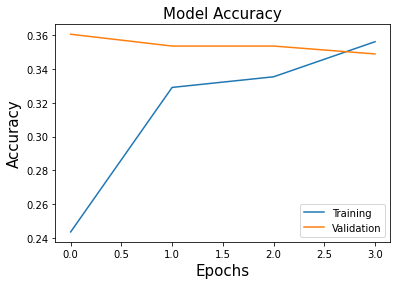

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['Training', 'Validation'])
plt.show()

Next I will show the Model's Loss on the Training and Validation sets after each epoch

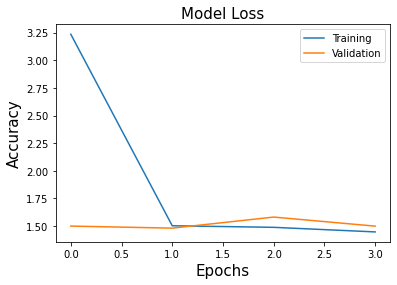

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['Training', 'Validation'])
plt.show()

The evaluation on the Test set is seen below, the 1st figure in the braket shows the model's loss and the second value show the models accuracy

In [18]:
model.evaluate(test_reshape,batch_size=batchsize,verbose=None)

[1.5003827810287476, 0.34246575832366943]

In [19]:
import numpy as np

# Load the optimal model weights found in the training stage
model.load_weights("weights.h5")

# Create a prediction from the test data set
y_pred = model.predict_generator(test_reshape)

# Add outcomes for the predictions to df
y_pred = np.argmax(y_pred, axis=1)

# Create lables for each category of flower in the data set with a list
labels = test_reshape.class_indices
labels = {v: k for k, v in labels.items()}
flowers_list = list(labels.values())

Print out a classification report of how the model performed between actual and predicted values, overall the model is only able to predict the category of flower 22% of the time (at the time the model was run, results may vary marginally when run again).

In [20]:
from sklearn.metrics import classification_report

print(classification_report(test_reshape.classes,y_pred,target_names=flowers_list))

              precision    recall  f1-score   support

       daisy       0.00      0.00      0.00        39
   dandelion       0.25      0.36      0.29        53
        rose       0.00      0.00      0.00        40
   sunflower       0.00      0.00      0.00        37
       tulip       0.21      0.60      0.31        50

    accuracy                           0.22       219
   macro avg       0.09      0.19      0.12       219
weighted avg       0.11      0.22      0.14       219



Print out the resutls of how each observation was predicted into a table by showing true positives, false postives, true negatives and false negatives 

Ideally we want to see the diagonal of figures from the top left to the bottom right showing strong/high figures and the rest of the figures showing weak/low figures (ideally zeros). This would mean that the model performed well on the unseen data set.

As we can see from the output this is not the case with the models predictions completely off in most categories.

In [21]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_reshape.classes,y_pred))

[[ 0 13  0  0 26]
 [ 0 19  0  0 34]
 [ 0 15  0  0 25]
 [ 0 10  0  0 27]
 [ 0 20  0  0 30]]


Show a graphical representation of how well the model predicted true positives, false postives, true negatives and false negatives

Ideally we want to see the diagonal of blocks from the top left to the bottom right showing strong results and the rest of the blocks showing weak results. This would mean that the model performed well on the unseen data set.

As we can see from the output this is not the case

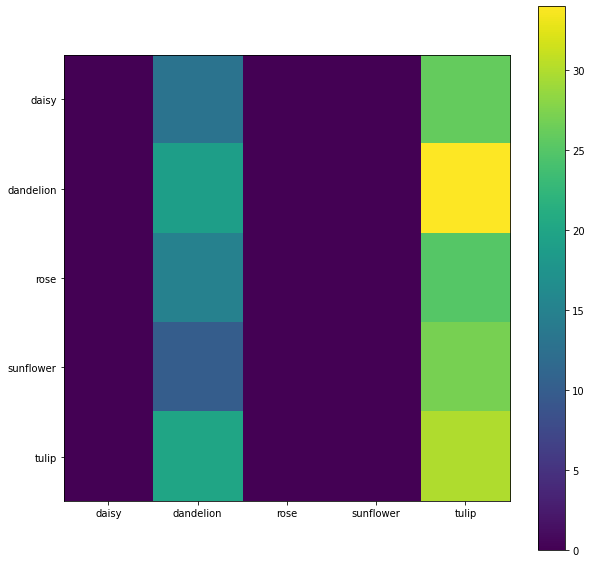

In [22]:
plt.figure(figsize=(10,10))
ticks = np.arange(len(flowers_list))
plt.xticks(ticks, flowers_list)
plt.yticks(ticks, flowers_list)

plt.imshow(confusion_matrix(test_reshape.classes,y_pred))
plt.colorbar()

### Try and improve the model by changing the following

***** 
Changes to the network build below

In [31]:
from keras import regularizers

# Start to the model build with 64 feature maps
model = Sequential()
model.add (Conv2D(64,3,strides=1,padding='same',activation='relu',input_shape=(112,112,3))) 
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid')) 
model.add(Dropout(0.1))

# Add another layer with 32 feature maps
model.add (Conv2D(32,3,strides=1,padding='same',activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid')) 
model.add(Dropout(0.1)) 
model.add(Flatten())

# Below we apply regularization (which would aid in situations where we have an overfitting issue)
# Similar to the concept of adding a penalty to coefficients in other models we add a penalty weight matrices for the nodes
# This is added to the dense layer
# We apply L2 regularization to the kernal (the grid used for feature extraction which moves over the image grid)  
model.add(Dense(32,kernel_regularizer=regularizers.l2(0.01),activation='relu'))

# As per the previous model there are 5 nodes in the final dense layer with softmax as the activation function
model.add(Dense(5,activation='softmax'))

# print a summary of the new model created
print(model.summary())

# Using the same compile features
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# (Keras Team, 2022)
# (Pramoditha, 2022)
# (Siddhartha, 2018)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 111, 111, 32)      18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 32)     

The new training process below

In [32]:
# The 3 variables will be changed below
epochs=20
stopearly=7
batchsize=48

# The rest stays the same
checkpoint = ModelCheckpoint("./weights.h5",monitor="val_accuracy",save_best_only = True,verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', patience=stopearly, verbose=1, restore_best_weights=True)
callbacks=[checkpoint,earlystop]
history=model.fit(train_reshape,
                    validation_data=val_reshape,
                    verbose=1,
                    epochs=epochs,
                    batch_size=batchsize,
                    callbacks=callbacks,)

Epoch 1/20
105/105 [==============================] - ETA: 0s - loss: 2.3584 - accuracy: 0.3465
Epoch 1: val_accuracy improved from -inf to 0.41395, saving model to .\weights.h5
105/105 [==============================] - 161s 2s/step - loss: 2.3584 - accuracy: 0.3465 - val_loss: 1.8404 - val_accuracy: 0.4140
Epoch 2/20
105/105 [==============================] - ETA: 0s - loss: 1.5348 - accuracy: 0.4757
Epoch 2: val_accuracy improved from 0.41395 to 0.45349, saving model to .\weights.h5
105/105 [==============================] - 285s 3s/step - loss: 1.5348 - accuracy: 0.4757 - val_loss: 1.5269 - val_accuracy: 0.4535
Epoch 3/20
105/105 [==============================] - ETA: 0s - loss: 1.4257 - accuracy: 0.5087
Epoch 3: val_accuracy improved from 0.45349 to 0.49535, saving model to .\weights.h5
105/105 [==============================] - 294s 3s/step - loss: 1.4257 - accuracy: 0.5087 - val_loss: 1.4269 - val_accuracy: 0.4953
Epoch 4/20
105/105 [==============================] - ETA: 0s - 

Check performance of the model with below

In [33]:
# Nothing has changed in below when creating a prediction from the test set using the model built.

model.load_weights("weights.h5")
y_pred = model.predict_generator(test_reshape)
y_pred = np.argmax(y_pred, axis=1)
labels = test_reshape.class_indices
labels = {v: k for k, v in labels.items()}
flowers_list = list(labels.values())

### Create a pipeline to report on model performance with the following steps
*****
*****
#### 1
Show the Model's Accuracy on the Training and Validation sets after each epoch
*****
#### 2
Show the Model's Loss on the Training and Validation sets after each epoch
*****
#### 3
The evaluation on the Test set is seen below, the 1st figure in the braket shows the model's loss and the second value show the models accuracy
*****
#### 4
Print out a classification report of how the model performed between actual and predicted values
*****
#### 5
Print out the resutls of how each observation was predicted into a table by showing true positives, false postives, true negatives and false negatives 
****
#### 6
Show a graphical representation of how well the model predicted true positives, false postives, true negatives and false negatives

Model Performance

Training and Validation Accuracy


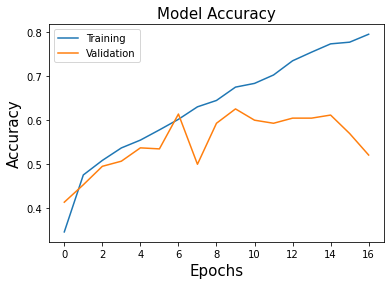


Training and Validation Loss


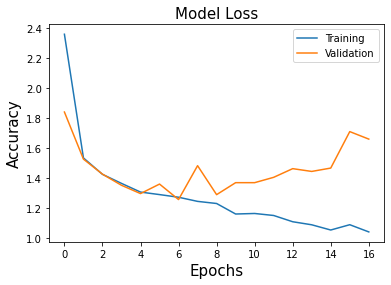


Model Loss/Accuracy On Unseen Test Data Set: [1.3644945621490479, 0.621004581451416]

Classification Report
              precision    recall  f1-score   support

       daisy       0.21      0.26      0.23        39
   dandelion       0.23      0.21      0.22        53
        rose       0.19      0.20      0.19        40
   sunflower       0.19      0.24      0.21        37
       tulip       0.27      0.18      0.22        50

    accuracy                           0.21       219
   macro avg       0.22      0.22      0.21       219
weighted avg       0.22      0.21      0.21       219


Confusion Matrix
None
[[10  6  9  9  5]
 [ 8 11 11 13 10]
 [12  9  8  7  4]
 [ 9  8  6  9  5]
 [ 9 14  9  9  9]]



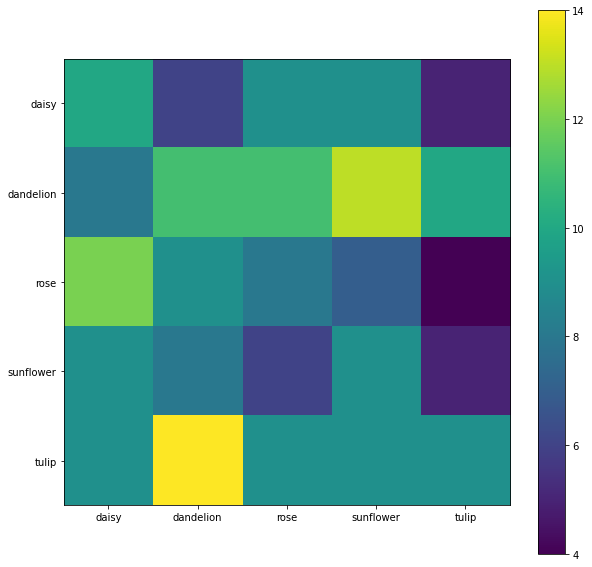

In [34]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
                 ('Model Performance',print('Model Performance')),
                 ('print blank space',print()),
                 
                 ('print heading',print('Training and Validation Accuracy')),
                 ('',plt.plot(history.history['accuracy'])),
                 ('',plt.plot(history.history['val_accuracy'])),
                 ('',plt.title('Model Accuracy',fontsize=15)),
                 ('',plt.ylabel('Accuracy',fontsize=15)),
                 ('',plt.xlabel('Epochs',fontsize=15)),
                 ('',plt.legend(['Training', 'Validation'])),
                 ('',plt.show()),
                 ('print blank space',print()),
                 
                 ('print heading',print('Training and Validation Loss')),
                 ('',plt.plot(history.history['loss'])),
                 ('',plt.plot(history.history['val_loss'])),
                 ('',plt.title('Model Loss',fontsize=15)),
                 ('',plt.ylabel('Accuracy',fontsize=15)),
                 ('',plt.xlabel('Epochs',fontsize=15)),
                 ('',plt.legend(['Training', 'Validation'])),
                 ('',plt.show()),
                 ('print blank space',print()),                 
                 
                 ('Show models accuracy on unseen data'
                  ,print(r'Model Loss/Accuracy On Unseen Test Data Set:',model.evaluate(test_reshape,batch_size=batchsize,verbose=None))),
                 ('print blank space',print()),
    
                 ('print heading',print('Classification Report')),
                 ('show report',print(classification_report(test_reshape.classes,y_pred,target_names=flowers_list))),
                 ('print blank space',print()),
                                  
                 ('print heading',print(print('Confusion Matrix'))),
                 ('show table',print(confusion_matrix(test_reshape.classes,y_pred))),
                 ('print blank space',print()),
                 
                 ('set figure size',plt.figure(figsize=(10,10))),
                 ('set xticks',plt.xticks(np.arange(len(flowers_list)), flowers_list)),
                 ('set yticks',plt.yticks(np.arange(len(flowers_list)), flowers_list)),
                 ('show graphical depiction',plt.imshow(confusion_matrix(test_reshape.classes,y_pred))),
                 ('insert color bar',plt.colorbar())
                 ])

# (Scikit-learn Developers, 2022)

From the output seen above we can see that the training and validation accuracy is improving however the validation accuracy is slightly below the training after most epochs.

Compared to the last model the overall score off the model shows that the model is performing weaker __however*__ each category is slighly more equip to classify each category (when comparing the confusion matrixs). 

Additionally, the model was able to make a significantly higher accurate prediction on the unseen test dataset than the previous model. 

As the checkpoint feature is in place which is set to use weights with the best values for accuracy stopping the model earlier is not as important if a lot of computing power is avaliable. 

What we can do is add more observations to the model using the data augmentation method. With the image data set we can manipulate the existing images to create more observations. This is done by flipping images, zooming in to different areas of the image, adjusting the rotation and so on. This will create more observations for the model to learn from.

Addtional epochs and and smalled batch sizes would also aid in training the model. 

Sacling all images to a larger size (like 224) may also aid in adding addtional information from which the model can detect patterns on.

An adjustment to the the layers of the training model coould also assist, for example, one could add more layer or start with a different number of nodes than 64 in the second model.

*****

# __Reference List__

<p>Abdul (2020) Keras Simple Classification, Train Validation Test. [Online]. 2020. Available at: https://www.kaggle.com/code/abdulwaheedsoudagar/keras-simple-classification-train-validation-test/notebook (Accessed: 1 November 2022).</p>
<p>Amidi, A. and Amidi, S. (2019) CS 230 - Convolutional Neural Networks Cheatsheet. [Online]. 2019. Available at: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks (Accessed: 1 November 2022).</p>
<p>Bandyopadhyay, H. (2022) Image Classification in Machine Learning [Intro + Tutorial]. [Online]. 21 October 2022. Available at: https://www.v7labs.com/blog/image-classification-guide#h1 (Accessed: 1 November 2022).</p>
<p>deeplizard (2017) Convolutional Neural Networks (CNNs) explained. [Online]. 9 December 2017. Available at: https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard (Accessed: 1 November 2022).</p>
<p>Doorwar, P. (2022) OS Module in Python with Examples. [Online]. 16 June 2022. Available at: https://www.geeksforgeeks.org/os-module-python-examples/ (Accessed: 1 November 2022).</p>
<p>Filter, J. (2022) split-folders: Split folders with files (e.g. images) into training, validation and test (dataset) folders. [Online]. 3 February 2022. Available at: https://pypi.org/project/split-folders/ (Accessed: 1 November 2022).</p>
<p>Keras Team (2022) Keras documentation: Keras API reference. [Online]. 2022. Available at: https://keras.io/api/ (Accessed: 1 November 2022).</p>
<p>Mamaev, A. (2021) Flowers Recognition. [Online]. 2021. Available at: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition (Accessed: 2 November 2022).</p>
<p>Pramoditha, R. (2022) How to Choose the Right Activation Function for Neural Networks. [Online]. 26 January 2022. Available at: https://towardsdatascience.com/how-to-choose-the-right-activation-function-for-neural-networks-3941ff0e6f9c (Accessed: 1 November 2022).</p>
<p>Python Software Foundation (2009) Python 3.7.2 documentation. [Online]. 2009. Available at: https://www.python.org/ (Accessed: 2 November 2022).</p>
<p>Scikit-learn Developers (2022) scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [Online]. 2022. Available at: https://scikit-learn.org/stable/index.html (Accessed: 4 November 2022).</p>
<p>Seaborn (2012) seaborn: statistical data visualization — seaborn 0.9.0 documentation. [Online]. 2012. Available at: https://seaborn.pydata.org/ (Accessed: 30 October 2022).</p>
<p>Siddhartha, M. (2018) Regularization Techniques in Deep Learning. [Online]. 2018. Available at: https://www.kaggle.com/code/sid321axn/regularization-techniques-in-deep-learning/notebook (Accessed: 7 November 2022).</p>
<p>TensorFlow Development Team (2022) Module: tf | TensorFlow Core v2.4.1. [Online]. 2022. Available at: https://www.tensorflow.org/api_docs/python/tf (Accessed: 1 November 2022).</p>
<p>The Matplotlib development team (2022) Matplotlib: Python plotting — Matplotlib 3.3.4 documentation. [Online]. 2022. Available at: https://matplotlib.org/stable/index.html (Accessed: 1 November 2022).</p>
<p>Towards AI Team (2020) Beginners Guide to Convolutional Neural Network from… – Towards AI. [Online]. 12 June 2020. Available at: https://towardsai.net/p/machine-learning/beginner-guides-to-convolutional-neural-network-from-scratch-kuzushiji-mnist-75f42c175b21 (Accessed: 1 November 2022).</p>

